<a href="https://www.kaggle.com/code/thirumani/shark-tank-india-analysis?scriptVersionId=115388807" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Shark Tank India (Season 1 & Season 2) Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Jan-03


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/2/2f/Shark_Tank_India.jpg', width=330, height=330)

### Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

### Check and import dataset

In [4]:
! ls -l /kaggle/input/d/thirumani/shark-tank-india/
shark_tank = pd.read_csv('/kaggle/input/d/thirumani/shark-tank-india//Shark Tank India.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 28
-rw-r--r-- 1 nobody nogroup 28651 Jan  3 14:18 'Shark Tank India.csv'

There are 135 rows and 53 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

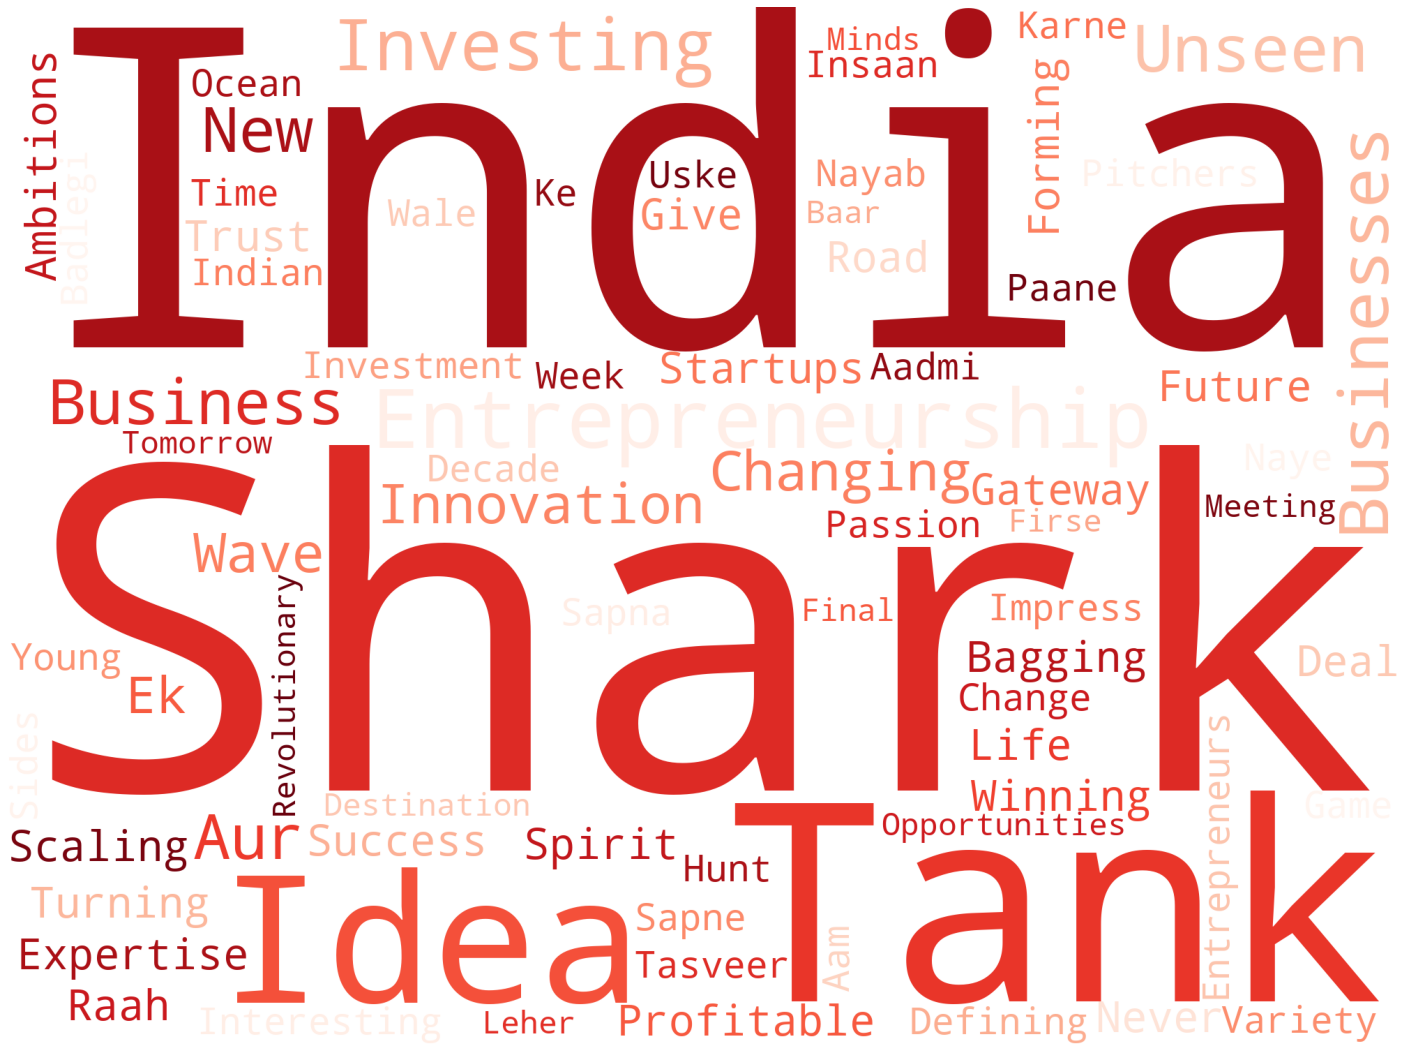

In [5]:
# Word cloud based on episode titles
text = " Shark Tank India ".join(cat for cat in shark_tank['Episode Title'])
stop_words = list(STOPWORDS) + ["Ka", "Ki", "Ko"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='white', colormap='Reds', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
shark_tank.head(5)

Season Number  Episode Number                Episode Title  Pitch Number  \
0              1               1  Badlegi Business Ki Tasveer             1   
1              1               1  Badlegi Business Ki Tasveer             2   
2              1               1  Badlegi Business Ki Tasveer             3   
3              1               2      Insaan, Ideas Aur Sapne             4   
4              1               2      Insaan, Ideas Aur Sapne             5   

          Startup Name             Industry  \
0       BluePine Foods                 Food   
1        Booz Scooters  Electrical Vehicles   
2  Heart up my Sleeves       Beauty/Fashion   
3           Tagz Foods                 Food   
4       Head and Heart            Education   

                            Business Description  \
0                                   Frozen Momos   
1  Renting e-bike for mobility in private spaces   
2                             Detachable Sleeves   
3                    Healthy Potato Chips Snacks   
4                       Brain Development Course   

                 Company Website  Number of Presenters  Male Presenters  \
0     https://bluepinefoods.com/                     3              2.0   
1        https://www.boozup.net/                     1              1.0   
2  https://heartupmysleeves.com/                     1              NaN   
3         https://tagzfoods.com/                     2              2.0   
4             https://thehnh.in/                     4              1.0   

   Female Presenters  Couple Presenters Pitchers Average Age  Started in  \
0                1.0                0.0               Middle      2016.0   
1                NaN                0.0                Young      2017.0   
2                1.0                0.0                Young      2021.0   
3                NaN                0.0               Middle      2019.0   
4                3.0                1.0               Middle      2015.0   

  Pitchers City Pitchers State  Yearly Revenue  Monthly Sales  Gross Margin  \
0         Delhi          Delhi            95.0       800000.0           NaN   
1     Ahmedabad        Gujarat             4.0        40000.0           NaN   
2         Delhi          Delhi             NaN       200000.0           NaN   
3     Bangalore      Karnataka           700.0            NaN          48.0   
4           NaN         Punjab            30.0            NaN           NaN   

   Original Ask Amount  Original Ask Equity  Valuation Requested  \
0                 50.0                  5.0                 1000   
1                 40.0                 15.0                  267   
2                 25.0                 10.0                  250   
3                 70.0                  1.0                 7000   
4                 50.0                  5.0                 1000   

   Received Offer  Accepted Offer  Total Deal Amount  ...  \
0               1             1.0               75.0  ...   
1               1             1.0               40.0  ...   
2               1             1.0               25.0  ...   
3               1             1.0               70.0  ...   
4               0             NaN                NaN  ...   

   Number of sharks in deal  Ashneer Investment Amount  \
0                       3.0                       25.0   
1                       2.0                       20.0   
2                       2.0                        0.0   
3                       1.0                       70.0   
4                       NaN                        NaN   

   Ashneer Investment Equity  Ashneer Debt Amount  Namita Investment Amount  \
0                       5.33                  NaN                       0.0   
1                      25.00                  NaN                       0.0   
2                       0.00                  NaN                       0.0   
3                       2.75                  NaN                       0.0   
4                        NaN 

In [7]:
shark_tank.tail(10).T

125  \
Season Number                                                  1   
Episode Number                                                 0   
Episode Title                                             Unseen   
Pitch Number                                                 126   
Startup Name                                             Clensta   
Industry                                          Beauty/Fashion   
Business Description       Waterless bathing technology products   
Company Website                             https://clensta.com/   
Number of Presenters                                           1   
Male Presenters                                              1.0   
Female Presenters                                            NaN   
Couple Presenters                                            0.0   
Pitchers Average Age                                      Middle   
Started in                                                2017.0   
Pitchers City                                              Delhi   
Pitchers State                                             Delhi   
Yearly Revenue                                               NaN   
Monthly Sales                                         15000000.0   
Gross Margin                                                 NaN   
Original Ask Amount                                        100.0   
Original Ask Equity                                          1.0   
Valuation Requested                                        10000   
Received Offer                                                 0   
Accepted Offer                                               NaN   
Total Deal Amount                                            NaN   
Total Deal Equity                                            NaN   
Total Deal Debt                                              NaN   
Valuation Offered                                            NaN   
Number of sharks in deal                                     NaN   
Ashneer Investment Amount                                    NaN   
Ashneer Investment Equity                                    NaN   
Ashneer Debt Amount                                          NaN   
Namita Investment Amount                                     NaN   
Namita Investment Equity                                     NaN   
Namita Debt Amount                                           NaN   
Anupam Investment Amount                                     NaN   
Anupam Investment Equity                                     NaN   
Anupam Debt Amount                                           NaN   
Vineeta Investment Amount                                    NaN   
Vineeta Investment Equity                                    NaN   
Vineeta Debt Amount                                          NaN   
Aman Investment Amount                                       NaN   
Aman Investment Equity                                       NaN   
Aman Debt Amount                                             NaN   
Peyush Investment Amount                                     NaN   
Peyush Investment Equity                                     NaN   
Peyush Debt Amount                                           NaN   
Ghazal Investment Amount                                     NaN   
Ghazal Investment Equity                                     NaN   
Ghazal Debt Amount                                           NaN   
Amit Investment Amount                                       NaN   
Amit Investment Equity                                       NaN   
Amit Debt Amount                                             NaN   

                                                               126  \
Season Number                                                    1   
Episode Number                                                   0   
Episode Title                                               Unseen   
Pitch Number                                                   127   
Startup Name                          

In [8]:
shark_tank['Male Presenters'] = shark_tank['Male Presenters'].astype(pd.Int32Dtype())
shark_tank['Female Presenters'] = shark_tank['Female Presenters'].astype(pd.Int32Dtype())
shark_tank['Started in'] = shark_tank['Started in'].astype(pd.Int32Dtype())
shark_tank['Yearly Revenue'] = shark_tank['Yearly Revenue'].astype(pd.Int32Dtype())
shark_tank['Monthly Sales'] = shark_tank['Monthly Sales'].astype(pd.Int32Dtype())

In [9]:
shark_tank.sample(10)

Season Number  Episode Number                            Episode Title  \
93               1              29                   Businesses Of Tomorrow   
108              1              33                      Life-Changing Ideas   
32               1              11                Investment Paane Ka Sapna   
115              1              35                    The Final Destination   
126              1               0                                   Unseen   
134              2               1  Entrepreneurship Ki Leher Ek Baar Firse   
130              1               0                                   Unseen   
110              1              33                      Life-Changing Ideas   
17               1               6                      New Week, New Ideas   
114              1              34                        Scaling Ambitions   

     Pitch Number              Startup Name        Industry  \
93             94                PDD Falcon   Manufacturing   
108           109                    Mavi's            Food   
32             33  ARRCOAT Surface Textures   Manufacturing   
115           116             Jain Shikanji            Food   
126           127          Infiniti Insects     Animal/Pets   
134           135                    Recode  Beauty/Fashion   
130           131                    Sattuz            Food   
110           111                    Proxgy      Technology   
17             18                    Hecoll  Beauty/Fashion   
114           115                   On2Cook            Food   

                                  Business Description  \
93                               Stainless Steel Items   
108                               Vegan Fermented Food   
32                      Wall Building Surface Textures   
115                                           Lemonade   
126                          Live insect feed for pets   
134                                 Beauty & cosmetics   
130                         Foods Beverages super food   
110                                    Virtual Reality   
17   Pollution Resistant Fabric - Healthy Cover For...   
114                             Fastest Cooking Device   

                             Company Website  Number of Presenters  \
93             https://falconproducts.co.in/                     2   
108                 https://mavispantry.com/                     2   
32                  https://www.arrcoat.com/                     3   
115          https://jainshikanjimasala.com/                     1   
126  https://infiniti-insects.business.site/                     2   
134          https://shop.recodestudios.com/                     2   
130                       https://sattuz.in/                     2   
110                  https://www.proxgy.com/                     2   
17                       https://hecoll.com/                     1   
114                     https://on2cook.com/                     1   

     Male Presenters  Female Presenters  Couple Presenters  \
93                 1                  1                1.0   
108                1                  1                1.0   
32                 3               <NA>                0.0   
115                1               <NA>                0.0   
126                1                  1                NaN   
134                2               <NA>                0.0   
130                1                  1                1.0   
110                2               <NA>                0.0   
17              <NA>                  1                0.0   
114                1               <NA>                0.0   

    Pitchers Average Age  Started in Pitchers City Pitchers State  \
93                 Young        2018   Gandhinagar        Gujarat   
108               Middle        2018         Thane    Maharashtra   
32                Middle        2019         Delhi          Delhi   
115               Middle        2017     Modinagar  Uttar Pradesh   
126

In [10]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              135 non-null    int64  
 1   Episode Number             135 non-null    int64  
 2   Episode Title              135 non-null    object 
 3   Pitch Number               135 non-null    int64  
 4   Startup Name               135 non-null    object 
 5   Industry                   135 non-null    object 
 6   Business Description       135 non-null    object 
 7   Company Website            133 non-null    object 
 8   Number of Presenters       135 non-null    int64  
 9   Male Presenters            113 non-null    Int32  
 10  Female Presenters          69 non-null     Int32  
 11  Couple Presenters          132 non-null    float64
 12  Pitchers Average Age       135 non-null    object 
 13  Started in                 104 non-null    Int32  

In [11]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [12]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 2
Number of unique values in Episode Number - 37
Number of unique values in Episode Title - 38
Number of unique values in Pitch Number - 135
Number of unique values in Startup Name - 135
Number of unique values in Industry - 11
Number of unique values in Business Description - 135
Number of unique values in Company Website - 133
Number of unique values in Number of Presenters - 5
Number of unique values in Male Presenters - 5
Number of unique values in Female Presenters - 3
Number of unique values in Couple Presenters - 2
Number of unique values in Pitchers Average Age - 3
Number of unique values in Started in - 12
Number of unique values in Pitchers City - 43
Number of unique values in Pitchers State - 20
Number of unique values in Yearly Revenue - 41
Number of unique values in Monthly Sales - 46
Number of unique values in Gross Margin - 22
Number of unique values in Original Ask Amount - 25
Number of unique values in Original Ask Equity - 19

## 🏦 Season one of SHARK TANK INDIA was broadcasted in SonyLiv OTT and Sony TV
### In 36 episodes, there were _(real)_ 121 pitches & few unseen pitches

In [13]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

2 seasons 

36 episodes 

135 startup companies came for pitching 



In [14]:
# there were 3 or 4 pitches in a each episode
print(shark_tank['Episode Number'].value_counts().sort_values(ascending=True).unique())

[ 3  4  6 10]


In [15]:
# Types of industries, came for investments
print(shark_tank['Industry'].value_counts())

tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank India </b>", template='simple_white', text=tmp)
fig.show()

Food                   40
Beauty/Fashion         25
Manufacturing          19
Technology             11
Services               10
Education               9
Medical                 8
Electrical Vehicles     4
Animal/Pets             4
Hardware                3
Sports                  2
Name: Industry, dtype: int64


In [16]:
# Gender wise
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")

print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')

Total pitchers - 275 

Total male pitchers - 190 

Total female pitchers - 83 

Male entrepreneurs percentage - 69.0%

Female entrepreneurs percentage - 30.0%

Couple entrepreneurs percentage - 10.0%



### ₹ 70% companies received offers and 30% startups could not convince Sharks to invest

1    94
0    41
Name: Received Offer, dtype: int64 

1    %%
0    %%
Name: Received Offer, dtype: object


<AxesSubplot:ylabel='Received Offer'>

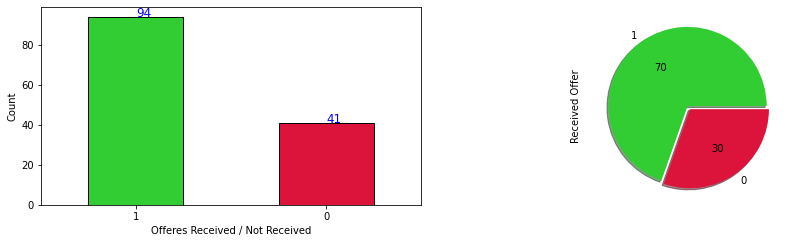

In [17]:
# Offers received
print(shark_tank['Received Offer'].value_counts(), "\n")
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))

plt.figure(figsize = (15,8))
ax1 = plt.subplot(221)
shark_tank["Received Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offeres Received / Not Received")
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Received Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=12, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Received Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True)

# 88 companies received investments and 33 startups could not get offers

### ＄ 77% companies accepted offers and 23% startups didn't accept Sharks offer

1.0    72
0.0    22
Name: Accepted Offer, dtype: int64 

1.0    77%
0.0    23%
Name: Accepted Offer, dtype: object


<AxesSubplot:ylabel='Accepted Offer'>

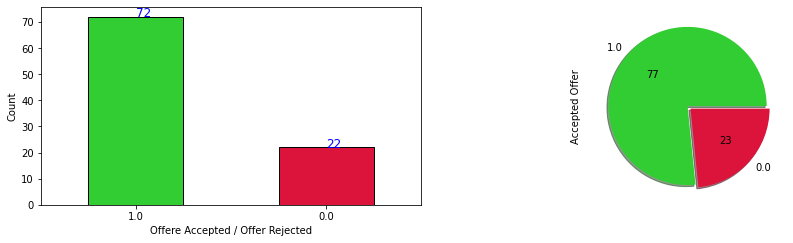

In [18]:
# Offers accepted
print(shark_tank['Accepted Offer'].value_counts(), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))

plt.figure(figsize = (15, 8))
ax1 = plt.subplot(221)
shark_tank["Accepted Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offere Accepted / Offer Rejected")
plt.ylabel("Count")
plt.xticks(rotation = 0)
for x,y in enumerate(shark_tank["Accepted Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=12, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Accepted Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True)

# 67 companies accepted investments they got and 21 startup companies did not accept offer

## ❗ Shark Tank India data set Visualizations/infographics in Tableau Public —
### https://public.tableau.com/app/profile/satya.thirumani/viz/SharkTankIndia_16448181343920/SharkTankIndiaStory

In [19]:
IFrame('https://public.tableau.com/views/SharkTankIndia_16448181343920/SharkTankIndiaStory', width=1100, height=1000)

In [20]:
# Maximum amount requested
print("Rs.", shark_tank["Original Ask Amount"].max()/100, "crores")

Rs. 300.0 crores


In [21]:
# Least amount requested
print("Rs.", shark_tank["Original Ask Amount"].min()*100000)

Rs. 5.0


In [22]:
# Offers rejected by pitchers/startup companies
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Startup Name","Industry","Original Ask Amount","Original Ask Equity"]]

Startup Name        Industry  Original Ask Amount  \
6            qZense Labs            Food                100.0   
19              Torch-it       Education                 75.0   
21         La Kheer Deli            Food                 50.0   
27        Kabira Handmad            Food                100.0   
41    Morriko Pure Foods            Food                100.0   
55     India Hemp and Co            Food                 50.0   
60            Keto India            Food                150.0   
70             Moonshine            Food                 80.0   
71               Falhari            Food                 50.0   
73          Urban Monkey  Beauty/Fashion                100.0   
74        Guardian Gears   Manufacturing                 30.0   
81                Alpino            Food                150.0   
87   Aliste Technologies      Technology                 60.0   
93            PDD Falcon   Manufacturing                 75.0   
94             PlayBoxTV        Services                100.0   
104       ExperentialEtc      Technology                200.0   
106          C3 Med-Tech         Medical                 35.0   
113        Green Protein            Food                 60.0   
116                Woloo      Technology                 50.0   
119         French Crown  Beauty/Fashion                150.0   
121             Devnagri      Technology                100.0   
131            Scintiglo         Medical                 75.0   

     Original Ask Equity  
6                   0.25  
19                  1.00  
21                  7.50  
27                  5.00  
41                  3.00  
55                  4.00  
60                  1.25  
70                  0.50  
71                  2.00  
73                  1.00  
74                  5.00  
81                  2.00  
87                  5.00  
93                  3.00  
94                  3.50  
104                 4.00  
106                 6.00  
113                 2.00  
116                 4.00  
119                 0.33  
121                 1.00  
131                 1.00

In [23]:
# Sum of investment amount asked by all startup companies, in Shark Tank, in India
print(format_currency(shark_tank['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹386.63 crores


In [24]:
# Sum of amount invested by all sharks, in Shark Tank India
print(format_currency(shark_tank['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹41.83 crores


In [25]:
# Sum of loan/debt amount given by all sharks, in India Shark Tank
print(format_currency(shark_tank['Total Deal Debt'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹3.51 crores


In [26]:
# Top 14 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(14))

tmpdf = shark_tank.sort_values('Total Deal Amount', ascending=False)[0:14]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest Investment as per deal amount (in lakhs)", text=tmpdf['Total Deal Amount'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
Aas Vidyalaya          150.0
Annie                  105.0
Get-A-Whey             100.0
Hammer Lifestyle       100.0
Hoovu                  100.0
Humpy A2               100.0
IN A CAN               100.0
Insurance Samadhan     100.0
Proxgy                 100.0
Raising Superstars     100.0
Revamp Moto            100.0
Skippi Ice Pops        100.0
Sunfox Technologies    100.0
The Renal Project      100.0
Name: Total Deal Amount, dtype: float64


In [27]:
# Top 10 investments, as per total equity/shares percentage
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
Sid07 Designs          75.00
Booz Scooters          50.00
Isak Fragrances        50.00
Hammer Lifestyle       40.00
KG Agrotech            40.00
The Sass Bar           35.00
Vivalyf Innovations    33.33
Gold Safe Solutions    30.00
Heart up my Sleeves    30.00
Jain Shikanji          30.00
Name: Total Deal Equity, dtype: float64


In [28]:
# Top 5 investments, as per total debt/loan amount
print(shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(5))

tmpdf = shark_tank.sort_values('Total Deal Debt', ascending=False)[0:5]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per Debt amount (in lakhs)", text=tmpdf['Total Deal Debt'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
Otua              99.0
Namhya Foods      50.0
Store My Goods    50.0
Bamboo India      30.0
NOCD              30.0
Name: Total Deal Debt, dtype: float64


In [29]:
# Startups who got Debt/loan amount
shark_tank.loc[shark_tank['Total Deal Debt'] > 0][["Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity","Total Deal Debt"]]

Startup Name  Original Ask Amount  Total Deal Amount  \
8               NOCD                 50.0               20.0   
44               PNT                 50.0               25.0   
46      Bamboo India                 80.0               50.0   
56              Otua                100.0                1.0   
62   The State Plate                 65.0               40.0   
66     Sid07 Designs                 47.0               25.0   
72      Namhya Foods                100.0               50.0   
77       KG Agrotech                 30.0               10.0   
120   Store My Goods                100.0               50.0   

     Total Deal Equity  Total Deal Debt  
8                 15.0             30.0  
44                25.0             25.0  
46                 3.5             30.0  
56                 1.0             99.0  
62                 3.0             25.0  
66                75.0             22.0  
72                10.0             50.0  
77                40.0             20.0  
120                4.0             50.0

## 💰 Which shark invested most ?

In [30]:
# Maximum Investment - as per Investment Amount
print("Aman invested -", max(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Aman invested - 9.46990016 crores


In [31]:
# Minimum Investment - as per Investment Amount
print("Ghazal invested -", min(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Ghazal invested - 1.599902525 crores


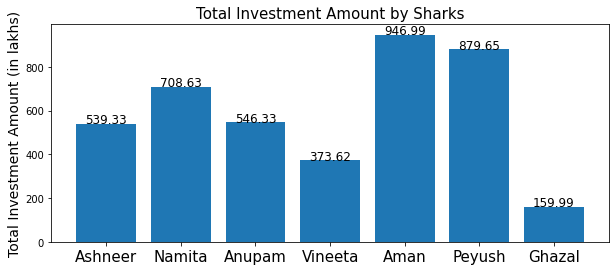

In [32]:
# Amount received by sharks
Amount = [shark_tank['Ashneer Investment Amount'].sum(), shark_tank['Namita Investment Amount'].sum(), shark_tank['Anupam Investment Amount'].sum(), shark_tank['Vineeta Investment Amount'].sum(),
    shark_tank['Aman Investment Amount'].sum(), shark_tank['Peyush Investment Amount'].sum(), shark_tank['Ghazal Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Amount':Amount }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=14)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount by Sharks", fontsize=15)
plt.show()

In [33]:
# Maximum Equity - who received maximum shares
print("Peyush got equity of -", max(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()), "% in different companies")

Peyush got equity of - 328.84 % in different companies


In [34]:
# Minimum Equity - who received least amount of shares
print("Ghazal got equity of -", min(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()), "% in different companies")

Ghazal got equity of - 51.7 % in different companies


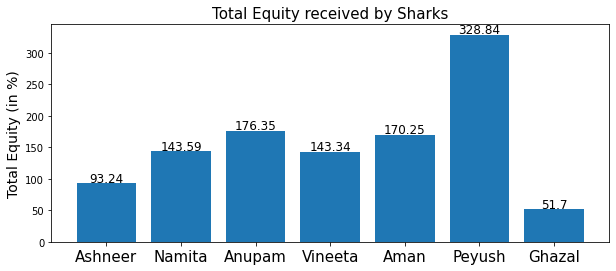

In [35]:
# Equity received by sharks
Equity = [shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()]
df = {'Name':name, 'Total Equity':Equity }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Equity (in %)",fontsize=14)
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks", fontsize=15)
plt.show()

In [36]:
# Maximum Investment - as per Debt/loaned Amount
print("Ashneer gave loan of -", max(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100), "crores")

Ashneer gave loan of - 1.17 crores


In [37]:
# Minimum Investment - as per Debt/loaned Amount - Ghazal has not given any loan
print("Ghazal gave loan of -", min(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100), "crores")

Ghazal gave loan of - 0.0 crores


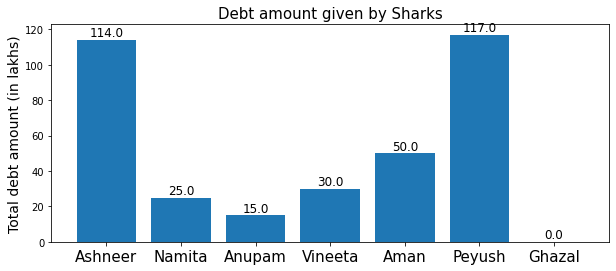

In [38]:
# Investment based on the  Debt/loaned Amount
debt = [shark_tank['Ashneer Debt Amount'].sum(), shark_tank['Namita Debt Amount'].sum(), shark_tank['Anupam Debt Amount'].sum(), shark_tank['Vineeta Debt Amount'].sum(),
    shark_tank['Aman Debt Amount'].sum(), shark_tank['Peyush Debt Amount'].sum(), shark_tank['Ghazal Debt Amount'].sum()]
df = {'Name':name, 'Total debt':debt }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total debt'])
plt.xticks(fontsize=15)
plt.ylabel("Total debt amount (in lakhs)",fontsize=14)
for index,d in enumerate(debt):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Debt amount given by Sharks", fontsize=15)
plt.show()

## 📊 my BIGG BOSS Dataset https://www.kaggle.com/datasets/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

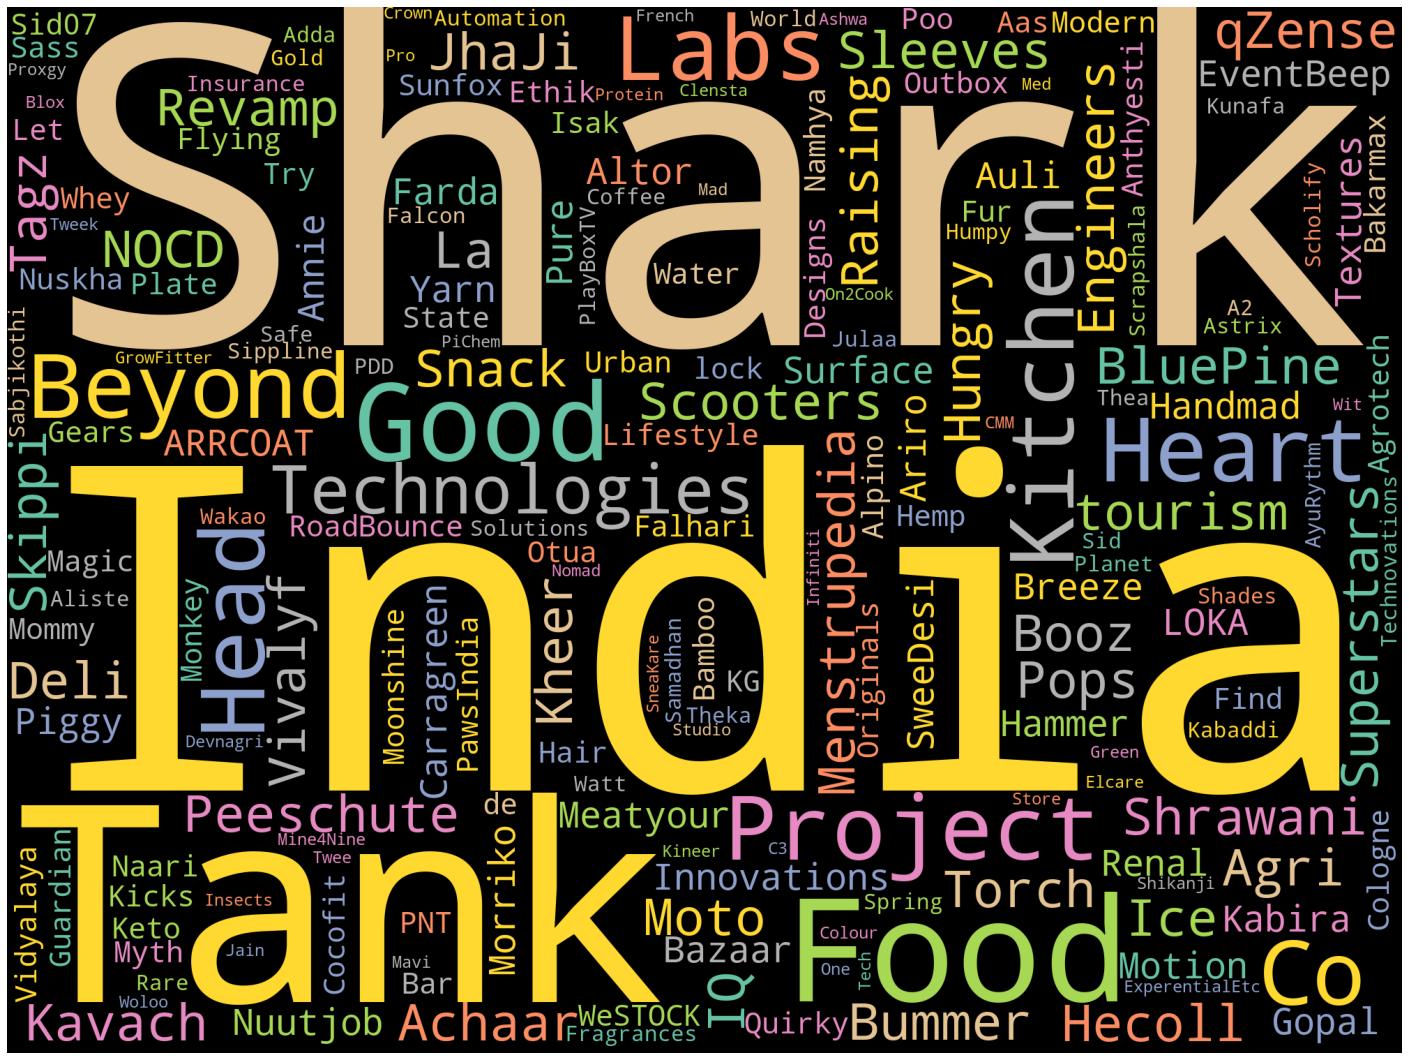

In [39]:
# Word cloud based on Startup Name
text = " Shark Tank India ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🔥 Ashneer Grover's Investments

Total investments by Ashneer 21
Investment amount by Ashneer 5.39 crores
Equity received by Ashneer 93.24 % in different companies
Debt/loan amount by Ashneer 1.14 crores

---------------------------------------------------------------------------
         Startup Name            Industry  Ashneer Investment Amount
       BluePine Foods                Food                      25.00
        Booz Scooters Electrical Vehicles                      20.00
           Tagz Foods                Food                      70.00
      Skippi Ice Pops                Food                      20.00
   Raising Superstars           Education                      50.00
         Beyond Snack                Food                      25.00
        Motion Breeze Electrical Vehicles                      30.00
            EventBeep           Education                      10.00
      The Yarn Bazaar       Manufacturing                      25.00
         Bamboo India       Manufacturing                     

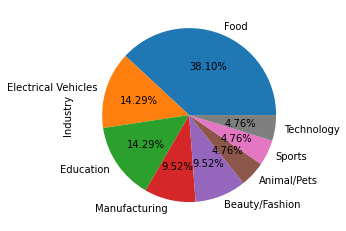

In [40]:
print("Total investments by Ashneer", shark_tank[shark_tank['Ashneer Investment Amount']>0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAshneer industry wise investments\n")
print(shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", title="<b>Total equity received by Ashneer (in %) for investment (in lakhs)</b>", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎆 Namita Thapar's Investments

Total investments by Namita 25
Investment amount by Namita 7.09 crores
Equity received by Namita 143.59 % in different companies
Debt/loan amount by Namita 0.25 crores

---------------------------------------------------------------------------
         Startup Name       Industry  Namita Investment Amount
         JhaJi Achaar           Food                 28.300000
               Bummer Beauty/Fashion                 37.500000
      Skippi Ice Pops           Food                 20.000000
         Menstrupedia      Education                 50.000000
                Altor  Manufacturing                 25.000000
              Nuutjob Beauty/Fashion                  8.330000
                Farda Beauty/Fashion                 15.000000
                 Auli Beauty/Fashion                 75.000000
                Annie      Education                 35.000000
    The Renal Project        Medical                 50.000000
              Cocofit           Food                  0.000016

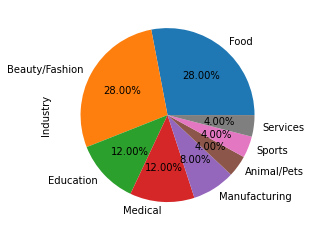

In [41]:
print("Total investments by Namita", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nNamita industry wise investments\n")
print(shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", title="<b>Total equity received by Namita (in %) for investment (in lakhs)</b>", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## ㊂ Anupam Mittal's Investments

Total investments by Anupam 26
Investment amount by Anupam 5.46 crores
Equity received by Anupam 176.35 % in different companies
Debt/loan amount by Anupam 0.15 crores

---------------------------------------------------------------------------
            Startup Name            Industry  Anupam Investment Amount
     Heart up my Sleeves      Beauty/Fashion                 12.500000
                  Cos IQ      Beauty/Fashion                 25.000000
             Revamp Moto Electrical Vehicles                 50.000000
         Skippi Ice Pops                Food                 20.000000
                  Kavach           Education                  2.500000
     Vivalyf Innovations             Medical                 28.000000
                Meatyour                Food                 10.000000
ARRCOAT Surface Textures       Manufacturing                 50.000000
                    LOKA          Technology                 13.330000
                   Annie           Education 

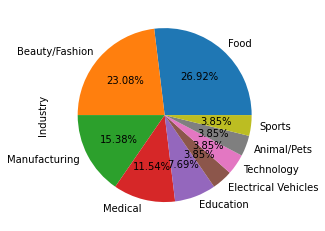

In [42]:
print("Total investments by Anupam", shark_tank[shark_tank['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAnupam industry wise investments\n")
print(shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", title="<b>Total equity received by Anupam (in %) for investment (in lakhs)</b>", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎇 Vineeta Singh's Investments
#### Vineeta's portfolio has 50% Food industry and 25% Beauty/Fashion industry

Total investments by Vineeta 18
Investment amount by Vineeta 3.74 crores
Equity received by Vineeta 143.34 % in different companies
Debt/loan amount by Vineeta 0.3 crores

---------------------------------------------------------------------------
       Startup Name            Industry  Vineeta Investment Amount
     BluePine Foods                Food                      25.00
      Booz Scooters Electrical Vehicles                      20.00
Heart up my Sleeves      Beauty/Fashion                      12.50
               NOCD                Food                      20.00
             Cos IQ      Beauty/Fashion                      25.00
       JhaJi Achaar                Food                      28.30
    Skippi Ice Pops                Food                      20.00
         Get-A-Whey                Food                      33.33
   The Quirky Naari      Beauty/Fashion                      17.50
Sunfox Technologies             Medical                      20.00
           Hump

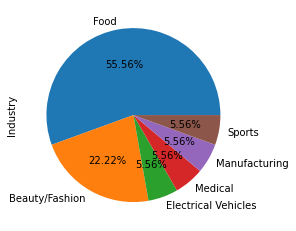

In [43]:
print("Total investments by Vineeta", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nVineeta industry wise investments\n")
print(shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", title="<b>Total equity received by Vineeta (in %) for investment (in lakhs)</b>", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🚀 Aman Gupta's Investments

Total investments by Aman 31
Investment amount by Aman 9.47 crores
Equity received by Aman 170.25 % in different companies
Debt/loan amount by Aman 0.5 crores

---------------------------------------------------------------------------
         Startup Name            Industry  Aman Investment Amount
       BluePine Foods                Food               25.000000
            Peeschute      Beauty/Fashion               75.000000
               Bummer      Beauty/Fashion               37.500000
          Revamp Moto Electrical Vehicles               50.000000
      Skippi Ice Pops                Food               20.000000
   Raising Superstars           Education               50.000000
               Kavach           Education                2.500000
         Beyond Snack                Food               25.000000
                Altor       Manufacturing               25.000000
                Ariro       Manufacturing               25.000000
              Nuutjob      Beauty/Fash

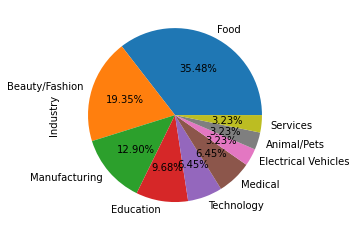

In [44]:
print("Total investments by Aman", shark_tank[shark_tank['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAman industry wise investments\n")
print(shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", title="<b>Total equity received by Aman (in %) for investment (in lakhs)</b>", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎾 Peyush Bansal's Investments

Total investments by Peyush 31
Investment amount by Peyush 8.8 crores
Equity received by Peyush 328.84 % in different companies
Debt/loan amount by Peyush 1.17 crores

---------------------------------------------------------------------------
         Startup Name       Industry  Peyush Investment Amount
  Vivalyf Innovations        Medical                 28.000000
                Ariro  Manufacturing                 25.000000
              Nuutjob Beauty/Fashion                  8.330000
             Meatyour           Food                 10.000000
            EventBeep      Education                 10.000000
                 LOKA     Technology                 13.330000
                Annie      Education                 35.000000
           Carragreen  Manufacturing                 25.000000
      The Yarn Bazaar  Manufacturing                 25.000000
                  PNT     Technology                 25.000000
Find Your Kicks India Beauty/Fashion                 10.000000


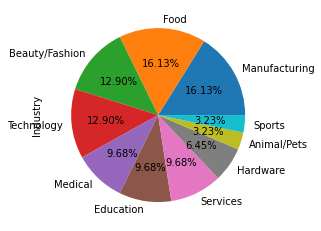

In [45]:
print("Total investments by Peyush", shark_tank[shark_tank['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nPeyush industry wise investments\n")
print(shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", title="<b>Total equity received by Peyush (in %) for investment (in lakhs)</b>", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎯 Ghazal Alagh's Investments

Total investments by Ghazal  8
Investment amount by Ghazal 1.6 crores
Equity received by Ghazal 51.7 % in different companies
Debt/loan amount by Ghazal 0.0 crores

---------------------------------------------------------------------------
       Startup Name       Industry  Ghazal Investment Amount
       The Sass Bar Beauty/Fashion                 25.000000
Sunfox Technologies        Medical                 20.000000
 Watt Technovations        Medical                  0.000253
           Humpy A2           Food                 33.330000
Gold Safe Solutions  Manufacturing                 16.660000
        Wakao Foods           Food                 25.000000
 Nomad Food Project           Food                 10.000000
           Wit Blox  Manufacturing                 30.000000
---------------------------------------------------------------------------

Ghazal industry wise investments

Food              3
Medical           2
Manufacturing     2
Beauty/Fashion    1
Name: Industry, dty

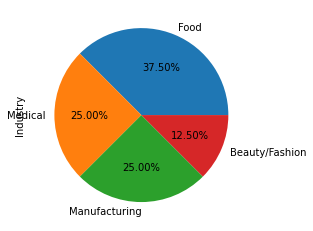

In [46]:
print("Total investments by Ghazal", shark_tank[shark_tank['Ghazal Investment Amount']>0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nGhazal industry wise investments\n")
print(shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(tmpdf, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name", title="<b>Total equity received by Ghazal (in %) for investment (in lakhs)</b>", text=tmpdf['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

2.0    25
1.0    22
3.0    16
4.0     5
5.0     4
Name: Number of sharks in deal, dtype: int64 

2.0    35%
1.0    31%
3.0    22%
4.0     7%
5.0     6%
Name: Number of sharks in deal, dtype: object


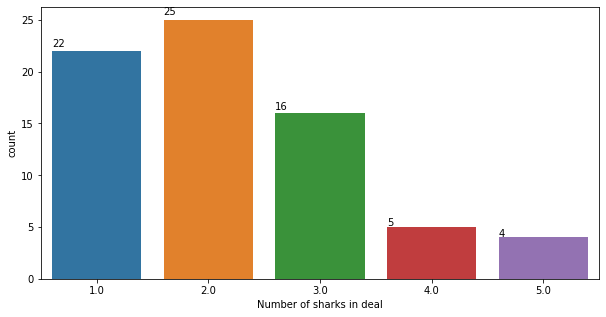

In [47]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))

fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02))

In [48]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Startup Name","Total Deal Amount","Total Deal Equity"]])

             Startup Name  Total Deal Amount  Total Deal Equity
15        Skippi Ice Pops              100.0               15.0
50  Find Your Kicks India               50.0               25.0
64               IN A CAN              100.0               10.0
80    Sunfox Technologies              100.0                6.0


In [49]:
print(shark_tank['Pitchers City'].value_counts(), "\n")

Mumbai                22
Delhi                 17
Bangalore             10
Pune                   9
Ahmedabad              6
Kolkata                5
Hyderabad              5
Gurgaon                4
Noida                  3
Jaipur                 3
Lucknow                2
Ludhiana               2
Gandhinagar            2
Nagpur                 2
Jammu                  2
Indore                 2
Surat                  2
Mangalore              1
Goa                    1
Nashik                 1
Varanasi               1
Coimbatore             1
Thane                  1
Pune, Delhi            1
Modinagar              1
Madhubani              1
Bengaluru              1
Bhagalpur              1
Mathura                1
Dehradun               1
Malegaon               1
Bangalore, Kolkata     1
Ernakulam              1
Baramati               1
Panipat                1
Valsad                 1
Chennai                1
Mohali,Delhi           1
Vadodara               1
Thiruvananthapuram     1


In [50]:
print(shark_tank['Pitchers State'].value_counts(), "\n")

Maharashtra               38
Delhi                     17
Gujarat                   13
Karnataka                 12
Uttar Pradesh              8
West Bengal                6
Haryana                    5
Telangana                  5
Punjab                     3
Bihar                      3
Rajasthan                  3
Jammu & Kashmir            2
Tamil Nadu                 2
Madhya Pradesh             2
Kerala                     2
Karnataka, West Bengal     1
Punjab, Delhi              1
Uttarakhand                1
Goa                        1
Maharashtra, Delhi         1
Name: Pitchers State, dtype: int64 



In [51]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(shark_tank.set_index('Pitchers State'))
merged['Original Ask Amount'] = merged['Original Ask Amount'].fillna(0)

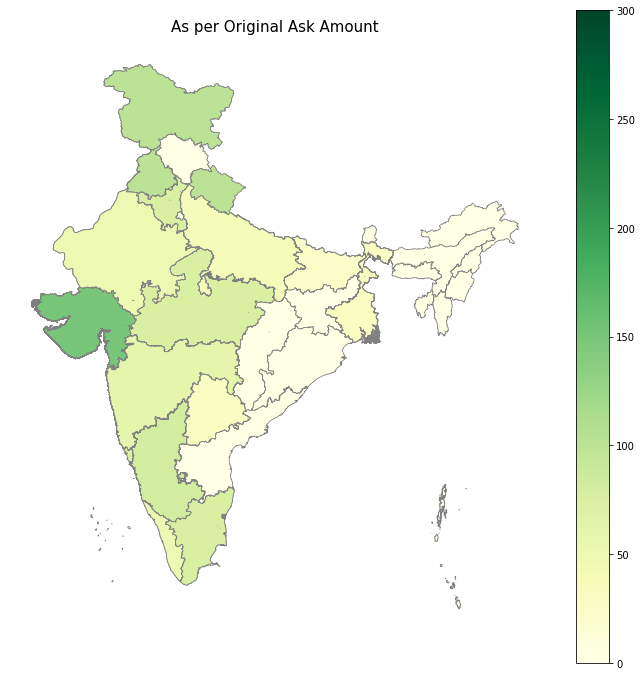

In [52]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('As per Original Ask Amount', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Original Ask Amount', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)

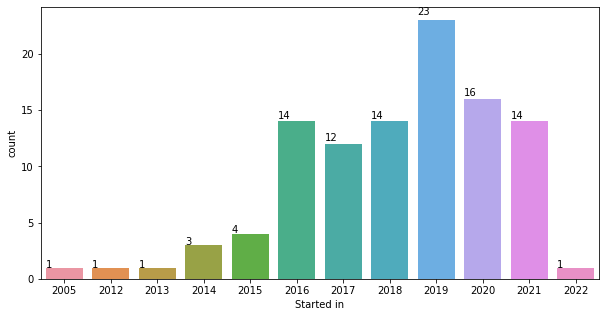

In [53]:
# Startup companies started in year
fig = plt.figure(figsize=(10, 5))
tmp = shark_tank.loc[shark_tank['Started in'].notnull()]
ax = sns.countplot(data = tmp, x = 'Started in')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02))

In [54]:
# Few companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name  Original Ask Amount  Total Deal Amount
0      BluePine Foods                 50.0               75.0
10       JhaJi Achaar                 50.0               85.0
15    Skippi Ice Pops                 45.0              100.0
37              Annie                 30.0              105.0
39    The Yarn Bazaar                 50.0              100.0
43   Hammer Lifestyle                 30.0              100.0
59            WeSTOCK                 50.0               60.0
64           IN A CAN                 50.0              100.0
76       The Sass Bar                 40.0               50.0
89           Humpy A2                 75.0              100.0
109        Tweek Labs                 40.0               60.0
110            Proxgy                 35.0              100.0
118          SneaKare                 20.0               21.0
132             Hoovu                 80.0              100.0

In [55]:
# Many companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Ask Equity'] < shark_tank["Total Deal Equity"]][["Startup Name","Original Ask Equity","Total Deal Equity"]]

Startup Name  Original Ask Equity  Total Deal Equity
0         BluePine Foods                 5.00              16.00
1          Booz Scooters                15.00              50.00
2    Heart up my Sleeves                10.00              30.00
3             Tagz Foods                 1.00               2.75
7              Peeschute                 4.00               6.00
..                   ...                  ...                ...
118             SneaKare                 5.00              12.00
120       Store My Goods                 1.75               4.00
122             Wit Blox                 3.00              10.00
132                Hoovu                 1.00               2.00
133                Dorji                 5.00              15.00

[66 rows x 3 columns]

In [56]:
# Below 3 companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Valuation Offered"]][["Startup Name","Valuation Requested","Valuation Offered"]]

Startup Name  Valuation Requested  Valuation Offered
20              Kavach                   50               50.0
22        Beyond Snack                 2000             2000.0
45             Cocofit                    0                0.0
86  Watt Technovations                    0                0.0

In [57]:
# There is NO company which got more valuation than they pitched, JhaJi Achaar received after the Season (in 2022)
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Valuation Offered"]][["Startup Name","Valuation Requested","Valuation Offered"]]

Startup Name  Valuation Requested  Valuation Offered
10  JhaJi Achaar                  500             1006.0

In [58]:
# Some companies were on pre-revenue or didn't had any revenue (as of pitching day)
shark_tank.loc[shark_tank['Yearly Revenue'] == 0]

Season Number  Episode Number                      Episode Title  \
24               1               8  Shark Ko Impress Karne Wale Ideas   
42               1              14            Naye Aur Nayab Pitchers   
83               1              26                Revolutionary Ideas   
98               1              30                Sharks Ki Expertise   
100              1              31           Entrepreneurship Ki Raah   
114              1              34                  Scaling Ambitions   

     Pitch Number      Startup Name             Industry  \
24             25     Motion Breeze  Electrical Vehicles   
42             43   Good Good Piggy           Technology   
83             84  Julaa Automation        Manufacturing   
98             99          Scholify            Education   
100           101        Sabjikothi        Manufacturing   
114           115           On2Cook                 Food   

              Business Description                   Company Website  \
24       Smart Electric Motorcycle  https://www.motionautomotive.in/   
42              Digital Piggy Bank        https://goodgoodpiggy.com/   
83                Automatic Cradle   https://www.automaticjulaa.com/   
98            Scholarship Platform           https://scholifyme.com/   
100  Vegetables Storage SaptKrishi       https://www.saptkrishi.com/   
114         Fastest Cooking Device              https://on2cook.com/   

     Number of Presenters  Male Presenters  Female Presenters  \
24                      4                4               <NA>   
42                      2             <NA>                  2   
83                      3                3               <NA>   
98                      1                1               <NA>   
100                     2                1                  1   
114                     1                1               <NA>   

     Couple Presenters Pitchers Average Age  Started in Pitchers City  \
24                 0.0               Middle        <NA>      Vadodara   
42                 0.0                Young        <NA>         Delhi   
83                 0.0               Middle        2022           NaN   
98                 0.0               Middle        <NA>     Bangalore   
100                0.0                Young        <NA>     Bhagalpur   
114                0.0               Middle        <NA>           NaN   

    Pitchers State  Yearly Revenue  Monthly Sales  Gross Margin  \
24         Gujarat               0           <NA>           NaN   
42           Delhi               0           <NA>           NaN   
83         Gujarat               0              0           NaN   
98       Karnataka               0           <NA>           NaN   
100          Bihar               0           <NA>           NaN   
114            NaN               0           <NA>           NaN   

     Original Ask Amount  Original Ask Equity  Valuation Requested  \
24                  30.0                  3.0                 1000   
42                  45.0                  5.0                  900   
83                  50.0                 10.0                  500   
98                  50.0                  7.5                  667   
100                 60.0                  2.5                 2400   
114                100.0                  1.0                10000   

     Received Offer  Accepted Offer  Total Deal Amount  ...  \
24                1             1.0               30.0  ...   
42                0             NaN                NaN  ...   
83                0             NaN                NaN  ...   
98                0             NaN                NaN  ...   
100               0             NaN                NaN  ...   
114               0             NaN                NaN  ...   

     Number of sharks in deal  Ashneer Investment Amount  \
24                        1.0                       30.0   
42                        NaN                        NaN   
83              

In [59]:
# Top 10 Highest Yearly Revenue brands
print(shark_tank.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", template='simple_white', title="<b>Highest revenue of participated startups</b>", text=tmpdf['Yearly Revenue'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
French Crown          7200
Guardian Gears        2500
Raising Superstars    1300
PlayBoxTV             1020
Alpino                1000
Hammer Lifestyle      1000
Shades of Spring       900
Tagz Foods             700
Devnagri               500
Moonshine              372
Name: Yearly Revenue, dtype: Int32


In [60]:
# Top 10 highest Gross Margin brands
print(shark_tank.groupby('Startup Name')['Gross Margin'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Gross Margin', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Gross Margin', color="Startup Name", template='simple_white', title="<b>Highest Gross margin of the brands</b>", text=tmpdf['Gross Margin'].map(int).map(str) + "%")
fig.show()

Startup Name
Poo-de-Cologne        150.0
Farda                 115.0
Cocofit                95.0
Auli                   80.0
Cos IQ                 75.0
Thea and Sid           75.0
Bummer                 70.0
French Crown           70.0
Moonshine              70.0
Nomad Food Project     70.0
Name: Gross Margin, dtype: float64


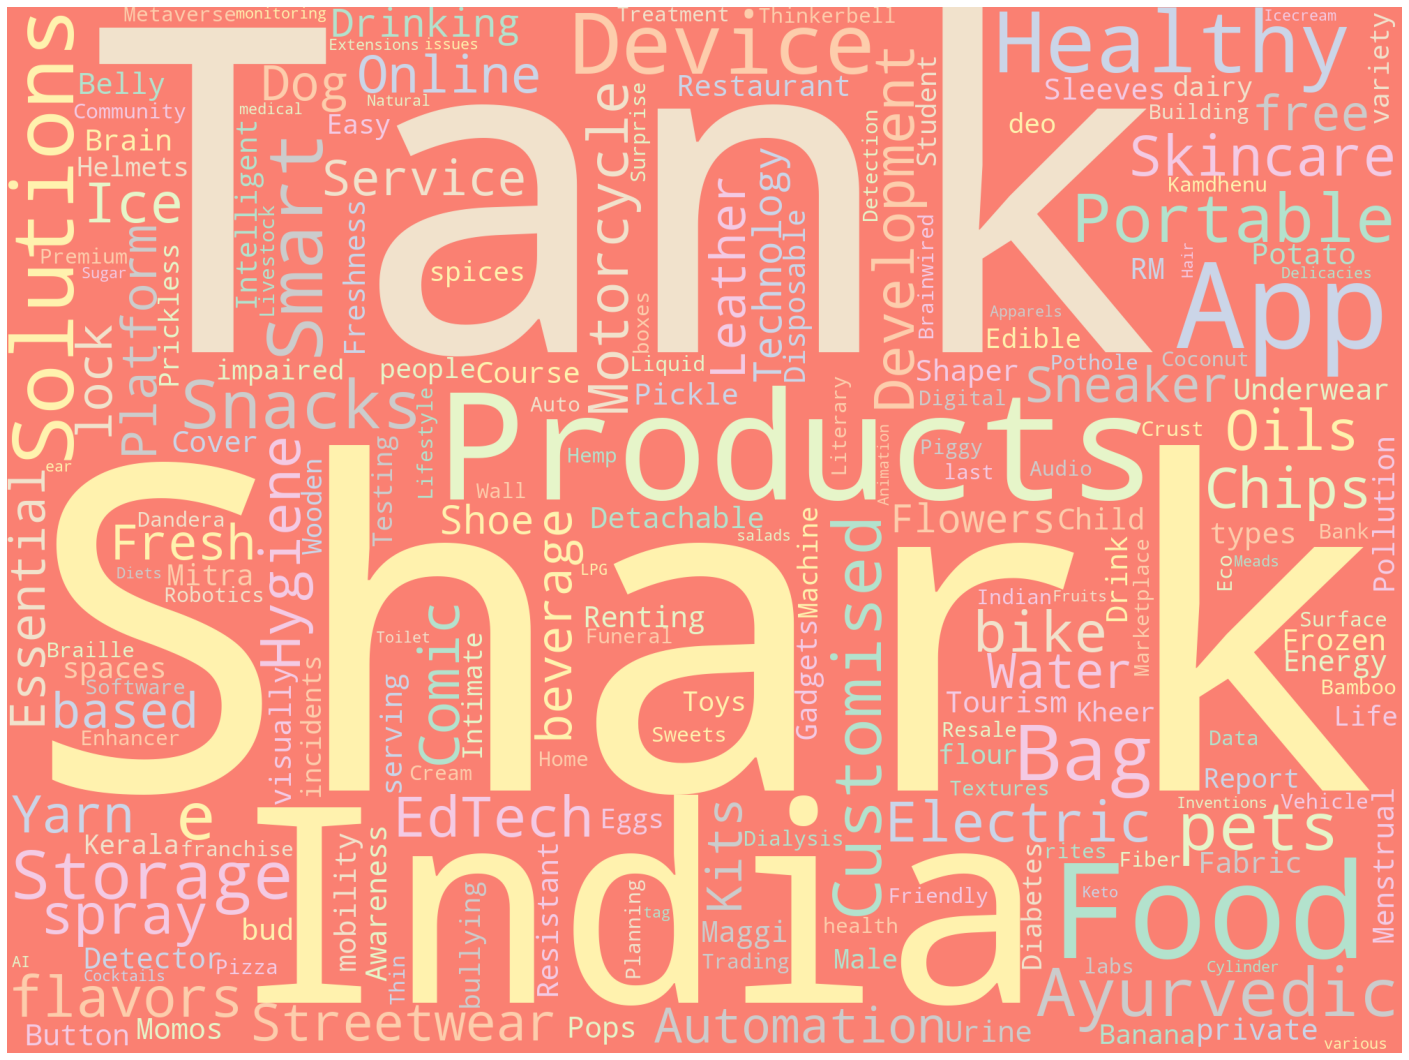

In [61]:
# Word cloud based on Business Description
text = " Shark Tank India ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel2', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Data set values verification
##### below queries should not return any rows

In [62]:
shark_tank.loc[shark_tank['Number of Presenters'] != shark_tank['Male Presenters'].fillna(0) + shark_tank['Female Presenters'].fillna(0)]

Season Number  Episode Number Episode Title  Pitch Number Startup Name  \
123              1               0        Unseen           124       Kineer   

    Industry     Business Description                 Company Website  \
123     Food  Packaged drinking water  https://www.kineerblessed.com/   

     Number of Presenters  Male Presenters  Female Presenters  \
123                     2             <NA>               <NA>   

     Couple Presenters Pitchers Average Age  Started in Pitchers City  \
123                0.0               Middle        2018           NaN   

    Pitchers State  Yearly Revenue  Monthly Sales  Gross Margin  \
123            NaN            <NA>         200000           NaN   

     Original Ask Amount  Original Ask Equity  Valuation Requested  \
123                100.0                 10.0                 1000   

     Received Offer  Accepted Offer  Total Deal Amount  ...  \
123               0             NaN                NaN  ...   

     Number of sharks in deal  Ashneer Investment Amount  \
123                       NaN                        NaN   

     Ashneer Investment Equity  Ashneer Debt Amount  Namita Investment Amount  \
123                        NaN                  NaN                       NaN   

     Namita Investment Equity  Namita Debt Amount  Anupam Investment Amount  \
123                       NaN                 NaN                       NaN   

     Anupam Investment Equity  Anupam Debt Amount  Vineeta Investment Amount  \
123                       NaN                 NaN                        NaN   

     Vineeta Investment Equity  Vineeta Debt Amount  Aman Investment Amount  \
123                        NaN                  NaN                     NaN   

     Aman Investment Equity  Aman Debt Amount  Peyush Investment Amount  \
123                     NaN               NaN                       NaN   

     Peyush Investment Equity  Peyush Debt Amount  Ghazal Investment Amount  \
123                       NaN                 NaN                       NaN   

     Ghazal Investment Equity  Ghazal Debt Amount  Amit Investment Amount  \
123                       NaN                 NaN                     NaN   

     Amit Investment Equity  Amit Debt Amount  
123                     NaN               NaN  

[1 rows x 53 columns]

In [63]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Original Ask Amount, Original Ask Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 53 columns]

In [64]:
shark_tank.loc[(shark_tank['Male Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Original Ask Amount, Original Ask Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 53 columns]

In [65]:
shark_tank.loc[(shark_tank['Female Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Original Ask Amount, Original Ask Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 53 columns]

In [66]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Ashneer Investment Amount'].fillna(0) + shark_tank['Namita Investment Amount'].fillna(0) + shark_tank['Anupam Investment Amount'].fillna(0) + shark_tank['Vineeta Investment Amount'].fillna(0) + shark_tank['Aman Investment Amount'].fillna(0) + shark_tank['Peyush Investment Amount'].fillna(0) + shark_tank['Ghazal Investment Amount'].fillna(0), 1)]

Season Number  Episode Number             Episode Title  Pitch Number  \
10              1               4  Entrepreneurship Ki Wave            11   

    Startup Name Industry Business Description              Company Website  \
10  JhaJi Achaar     Food               Pickle  https://www.jhajistore.com/   

    Number of Presenters  Male Presenters  Female Presenters  \
10                     2             <NA>                  2   

    Couple Presenters Pitchers Average Age  Started in Pitchers City  \
10                0.0                  Old        2021     Darbhanga   

   Pitchers State  Yearly Revenue  Monthly Sales  Gross Margin  \
10          Bihar            <NA>         500000          18.0   

    Original Ask Amount  Original Ask Equity  Valuation Requested  \
10                 50.0                 10.0                  500   

    Received Offer  Accepted Offer  Total Deal Amount  ...  \
10               1             1.0               85.0  ...   

    Number of sharks in deal  Ashneer Investment Amount  \
10                       2.0                        NaN   

    Ashneer Investment Equity  Ashneer Debt Amount  Namita Investment Amount  \
10                        NaN                  NaN                      28.3   

    Namita Investment Equity  Namita Debt Amount  Anupam Investment Amount  \
10                      2.81                 NaN                       NaN   

    Anupam Investment Equity  Anupam Debt Amount  Vineeta Investment Amount  \
10                       NaN                 NaN                       28.3   

    Vineeta Investment Equity  Vineeta Debt Amount  Aman Investment Amount  \
10                       2.81                  NaN                     NaN   

    Aman Investment Equity  Aman Debt Amount  Peyush Investment Amount  \
10                     NaN               NaN                       NaN   

    Peyush Investment Equity  Peyush Debt Amount  Ghazal Investment Amount  \
10                       NaN                 NaN                       NaN   

    Ghazal Investment Equity  Ghazal Debt Amount  Amit Investment Amount  \
10                       NaN                 NaN                     NaN   

    Amit Investment Equity  Amit Debt Amount  
10                     NaN               NaN  

[1 rows x 53 columns]

In [67]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Ashneer Investment Equity'].fillna(0) + shark_tank['Namita Investment Equity'].fillna(0) + shark_tank['Anupam Investment Equity'].fillna(0) + shark_tank['Vineeta Investment Equity'].fillna(0) + shark_tank['Aman Investment Equity'].fillna(0) + shark_tank['Peyush Investment Equity'].fillna(0) + shark_tank['Ghazal Investment Equity'].fillna(0),1)]

Season Number  Episode Number             Episode Title  Pitch Number  \
10              1               4  Entrepreneurship Ki Wave            11   

    Startup Name Industry Business Description              Company Website  \
10  JhaJi Achaar     Food               Pickle  https://www.jhajistore.com/   

    Number of Presenters  Male Presenters  Female Presenters  \
10                     2             <NA>                  2   

    Couple Presenters Pitchers Average Age  Started in Pitchers City  \
10                0.0                  Old        2021     Darbhanga   

   Pitchers State  Yearly Revenue  Monthly Sales  Gross Margin  \
10          Bihar            <NA>         500000          18.0   

    Original Ask Amount  Original Ask Equity  Valuation Requested  \
10                 50.0                 10.0                  500   

    Received Offer  Accepted Offer  Total Deal Amount  ...  \
10               1             1.0               85.0  ...   

    Number of sharks in deal  Ashneer Investment Amount  \
10                       2.0                        NaN   

    Ashneer Investment Equity  Ashneer Debt Amount  Namita Investment Amount  \
10                        NaN                  NaN                      28.3   

    Namita Investment Equity  Namita Debt Amount  Anupam Investment Amount  \
10                      2.81                 NaN                       NaN   

    Anupam Investment Equity  Anupam Debt Amount  Vineeta Investment Amount  \
10                       NaN                 NaN                       28.3   

    Vineeta Investment Equity  Vineeta Debt Amount  Aman Investment Amount  \
10                       2.81                  NaN                     NaN   

    Aman Investment Equity  Aman Debt Amount  Peyush Investment Amount  \
10                     NaN               NaN                       NaN   

    Peyush Investment Equity  Peyush Debt Amount  Ghazal Investment Amount  \
10                       NaN                 NaN                       NaN   

    Ghazal Investment Equity  Ghazal Debt Amount  Amit Investment Amount  \
10                       NaN                 NaN                     NaN   

    Amit Investment Equity  Amit Debt Amount  
10                     NaN               NaN  

[1 rows x 53 columns]

In [68]:
shark_tank.loc[round(shark_tank['Total Deal Debt'].fillna(0),1) != round(shark_tank['Ashneer Debt Amount'].fillna(0) + shark_tank['Namita Debt Amount'].fillna(0) + shark_tank['Anupam Debt Amount'].fillna(0) + shark_tank['Vineeta Debt Amount'].fillna(0) + shark_tank['Aman Debt Amount'].fillna(0) + shark_tank['Peyush Debt Amount'].fillna(0) + shark_tank['Ghazal Debt Amount'].fillna(0),1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Original Ask Amount, Original Ask Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 53 columns]

In [69]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [70]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))
 
# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.3
# seaborn version: 0.11.2
# plotly version: 5.10.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.3
seaborn version: 0.11.2
plotly version: 5.10.0


### ⭐  Hindi Bigg Boss Season16
### https://www.kaggle.com/code/thirumani/predicting-bigg-boss-hindi-season-16-winner
